In [125]:
import torch 
from torchvision import transforms , models 
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np

In [126]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [127]:
model = models.vgg19(pretrained=True).features
for p in model.parameters():
    p.requires_grad = False
model.to(device)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [128]:
def model_activations(input,model):
    layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
    }
    features = {}
    x = input
    x = x.unsqueeze(0)
    for name,layer in model._modules.items():
        x = layer(x)
        if name in layers:
            features[layers[name]] = x 
    
    return features

In [129]:
transform = transforms.Compose([transforms.Resize(500),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [130]:
content = Image.open("/content/cm1").convert("RGB")
content = transform(content).to(device)
print("COntent shape => ", content.shape)
style = Image.open("/content/m1").convert("RGB")
style = transform(style).to(device)

COntent shape =>  torch.Size([3, 647, 500])


In [131]:
def imcnvt(image):
    x = image.to("cpu").clone().detach().numpy().squeeze()
    x = x.transpose(1,2,0)
    x = x*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    return np.clip(x,0,1)

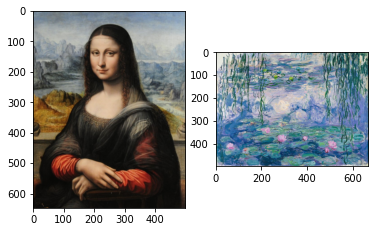

In [132]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(imcnvt(content),label = "Content")
ax2.imshow(imcnvt(style),label = "Style")
plt.show()

def gram_matrix(imgfeature):
    _,d,h,w = imgfeature.size()
    imgfeature = imgfeature.view(d,h*w)
    gram_mat = torch.mm(imgfeature,imgfeature.t())
    
    return gram_mat

In [133]:
target = content.clone().requires_grad_(True).to(device)

#set device to cuda if available
print("device = ",device)


style_features = model_activations(style,model)
content_features = model_activations(content,model)

style_wt_meas = {"conv1_1" : 1, 
                 "conv2_1" : 1,
                 "conv3_1" : 1,
                 "conv4_1" : 1,
                 "conv5_1" : 1}

style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}


device =  cuda


epoch  10   tensor(1.7386e+20, device='cuda:0', grad_fn=<AddBackward0>)
epoch  20   tensor(1.0295e+20, device='cuda:0', grad_fn=<AddBackward0>)
epoch  30   tensor(6.4120e+19, device='cuda:0', grad_fn=<AddBackward0>)
epoch  40   tensor(3.7279e+19, device='cuda:0', grad_fn=<AddBackward0>)
epoch  50   tensor(2.1504e+19, device='cuda:0', grad_fn=<AddBackward0>)
epoch  60   tensor(1.4265e+19, device='cuda:0', grad_fn=<AddBackward0>)
epoch  70   tensor(1.1678e+19, device='cuda:0', grad_fn=<AddBackward0>)
epoch  80   tensor(1.0185e+19, device='cuda:0', grad_fn=<AddBackward0>)
epoch  90   tensor(8.9658e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  100   tensor(8.0603e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  110   tensor(7.3706e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  120   tensor(6.8029e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  130   tensor(6.3230e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  140   tensor(5.9114e+18, device='cuda:0', grad_fn=<Ad

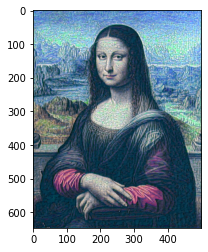

epoch  410   tensor(1.8345e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  420   tensor(1.7718e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  430   tensor(1.7118e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  440   tensor(1.6543e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  450   tensor(1.5992e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  460   tensor(1.5464e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  470   tensor(1.4958e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  480   tensor(1.4472e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  490   tensor(1.4006e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  500   tensor(1.3558e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  510   tensor(1.3127e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  520   tensor(1.2713e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  530   tensor(1.2315e+18, device='cuda:0', grad_fn=<AddBackward0>)
epoch  540   tensor(1.1932e+18, device='cuda:0', gr

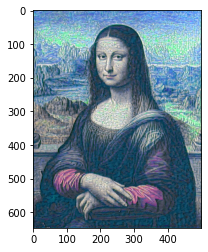

epoch  810   tensor(5.3782e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  820   tensor(5.2296e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  830   tensor(5.0856e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  840   tensor(4.9459e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  850   tensor(4.8105e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  860   tensor(4.6791e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  870   tensor(4.5518e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  880   tensor(4.4282e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  890   tensor(4.3084e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  900   tensor(4.1921e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  910   tensor(4.0792e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  920   tensor(3.9697e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  930   tensor(3.8635e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  940   tensor(3.7604e+17, device='cuda:0', gr

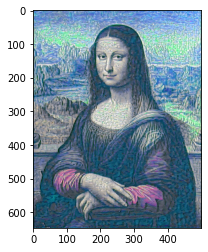

epoch  1210   tensor(1.8699e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1220   tensor(1.8245e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1230   tensor(1.7803e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1240   tensor(1.7373e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1250   tensor(1.6956e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1260   tensor(1.6551e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1270   tensor(1.6157e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1280   tensor(1.5774e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1290   tensor(1.5402e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1300   tensor(1.5040e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1310   tensor(1.4689e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1320   tensor(1.4348e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1330   tensor(1.4016e+17, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1340   tensor(1.3693e+17, devic

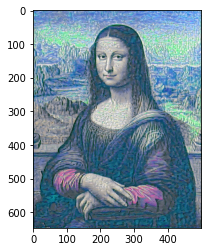

epoch  1610   tensor(7.6635e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1620   tensor(7.5149e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1630   tensor(7.3702e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1640   tensor(7.2293e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1650   tensor(7.0921e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1660   tensor(6.9586e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1670   tensor(6.8286e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1680   tensor(6.7019e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1690   tensor(6.5785e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1700   tensor(6.4582e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1710   tensor(6.3411e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1720   tensor(6.2270e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1730   tensor(6.1158e+16, device='cuda:0', grad_fn=<AddBackward0>)
epoch  1740   tensor(6.0074e+16, devic

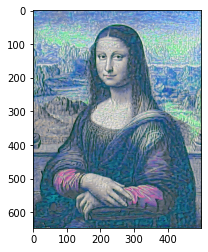

In [134]:
content_wt = 100
style_wt = 1e8

print_after = 400
epochs = 2000
optimizer = torch.optim.Adam([target],lr=0.007)

for i in range(1,epochs+1):
    target_features = model_activations(target,model)
    content_loss = torch.mean((content_features['conv4_2']-target_features['conv4_2'])**2)

    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _,d,w,h = target_gram.shape
        target_gram = gram_matrix(target_gram)

        style_loss += (style_wt_meas[layer]*torch.mean((target_gram-style_gram)**2))/d*w*h
    
    total_loss = content_wt*content_loss + style_wt*style_loss 
    
    if i%10==0:       
        print("epoch ",i," ", total_loss)
    
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    if i%print_after == 0:
        plt.imshow(imcnvt(target),label="Epoch "+str(i))
        plt.show()
        plt.imsave(str(i)+'.png',imcnvt(target),format='png')